#Sentiment Analysis Twitter with [snscrape] and [vader]

Referensi :

*   https://www.youtube.com/watch?v=jtIMnmbnOFo
*   https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d


## Install Modules and Import Library

In [ ]:
!pip install textblob
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd

# data scraping
import snscrape.modules.twitter as sntwitter

# sentiment analysis
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

# chart
import matplotlib.pyplot as plt

# data cleaning
import re
import string

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


## Data Scraping

Library = `snscrape`

data scraping twitter menurut search keyword \
Time Range = 1 Januari 2022 - 20 April 2022 \
Keyword =
*   ui ux
*   android develop

Hasil data scraping akan disimpan di runtime ini

Karena proses run lama, gapapa kalo section ini gausah di run lagi. Langsung import dataset hasil scraping di section bawahnya


# **AWS**

In [ ]:
# Scraping aws
# Jangan di run lagi, soalnya lumayan lama. dataset hasil scraping dah ku save bentuk csv. nanti tinggal pake csv itu buat sentiment analysis

query = "aws (cloud OR service OR data OR amazon) lang:id until:2022-04-20 since:2022-01-01"
tweets = []
limit = 10000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():

    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content])

df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
df.head()

# to save to csv
df.to_csv('tweets_awsfilter.csv')

## Sentiment Keyword = AWS

### Import Dataset

In [ ]:
#import dataset aws
url='https://drive.google.com/file/d/1R9EjXurX-k0lnZucc1CwV4e_vUx1Jc5y/view?usp=sharing'
file_id=url.split('/')[-2]
file_name='https://drive.google.com/uc?id=' + file_id
query = "AWS cloud lang:id since:2022-01-01"

aws = pd.read_csv(file_name)
aws.head()

,Unnamed: 0,Date,User,Tweet
0,0,2022-04-19 23:05:28+00:00,CoolGray_,@_SkUmer Masan jaan chudai ay shah g🙏🏻🌚\n\nChe...
1,1,2022-04-19 17:20:28+00:00,AWSBlogUnreal,The AWS Big Data Blog #AWSBigData\nhttps://t.c...
2,2,2022-04-19 17:20:26+00:00,AWSBlogUnreal,The AWS Big Data Blog #AWSBigData\nhttps://t.c...
3,3,2022-04-19 16:04:09+00:00,MarlianaShela,AWS Rilis Layanan Amazon IVS Pops di Jakarta d...
4,4,2022-04-19 15:32:29+00:00,opsiin,AWS Rilis Layanan Amazon IVS Pops di Jakarta d...


In [ ]:
aws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  331 non-null    int64 
 1   Date        331 non-null    object
 2   User        331 non-null    object
 3   Tweet       331 non-null    object
dtypes: int64(1), object(3)
memory usage: 10.5+ KB


### Data Preprocessing

*   Menghapus Row yang Null
*   menghapus Row yang sama (duplicate row)
*   Memfilter Retweet, tag, dan link
*   Mengubah Tweet ke dalam bentuk lowercase
*   Menghapus Kolom yang tidak digunakan



In [ ]:
tw_list = aws

#Cleaning Text (RT, Punctuation etc)

tw_list['text'] = tw_list['Tweet']
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",str(x))
remove_tag = lambda x: re.sub(r'@\S+ '," ",x)
remove_link = lambda x: re.sub(r'http\S+', '', x)

tw_list['Tweet'] = tw_list.Tweet.map(remove_rt).map(remove_tag).map(remove_link)
#tw_list = tw_list[tw_list['Tweet'].str.contains('AWS', regex=False, case=True, na = False)]
tw_list['Tweet'] = tw_list.Tweet.str.lower()

tw_list.to_excel('tweets_AWS.xlsx')
tw_list.head()

,Unnamed: 0,Date,User,Tweet,text
0,0,2022-04-19 23:05:28+00:00,CoolGray_,masan jaan chudai ay shah g🙏🏻🌚\n\ncheez mazay...,@_SkUmer Masan jaan chudai ay shah g🙏🏻🌚\n\nChe...
1,1,2022-04-19 17:20:28+00:00,AWSBlogUnreal,the aws big data blog #awsbigdata\n\nby: dipan...,The AWS Big Data Blog #AWSBigData\nhttps://t.c...
2,2,2022-04-19 17:20:26+00:00,AWSBlogUnreal,the aws big data blog #awsbigdata\n\nby: rahul...,The AWS Big Data Blog #AWSBigData\nhttps://t.c...
3,3,2022-04-19 16:04:09+00:00,MarlianaShela,aws rilis layanan amazon ivs pops di jakarta d...,AWS Rilis Layanan Amazon IVS Pops di Jakarta d...
4,4,2022-04-19 15:32:29+00:00,opsiin,aws rilis layanan amazon ivs pops di jakarta d...,AWS Rilis Layanan Amazon IVS Pops di Jakarta d...


In [ ]:
tw_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  331 non-null    int64 
 1   Date        331 non-null    object
 2   User        331 non-null    object
 3   Tweet       331 non-null    object
 4   text        331 non-null    object
dtypes: int64(1), object(4)
memory usage: 13.1+ KB


Note :

[Tweet] = Hasil Filter \
[text] = Raw Tweet

In [ ]:
# Removing [Unnamed:0] and [text]
tw_list.drop(['Unnamed: 0', 'text'], axis=1, inplace=True)

# Removing Null Row
tw_list.dropna(inplace=True)
tw_list.reset_index(drop=True, inplace=True)

# Removing Duplicate row
tw_list.drop_duplicates(inplace = True)

### Sentiment Analysis

Library = vader

In [ ]:
# Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)

noOfTweet = len(tw_list)
positive = 0
negative = 0
neutral = 0
polarity = 0

# Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in tw_list.iterrows():
  analysis = TextBlob(str(row['Tweet']))
  score = SentimentIntensityAnalyzer().polarity_scores(str(row['Tweet']))
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  if neg > pos:
    tw_list.loc[index, 'sentiment'] = 'negative'
    negative += 1
  elif pos > neg:
    tw_list.loc[index, 'sentiment'] = 'positive'
    positive += 1
  else:
    tw_list.loc[index, 'sentiment'] = 'neutral'
    neutral += 1

  tw_list.loc[index, 'neg'] = neg
  tw_list.loc[index, 'neu'] = neu
  tw_list.loc[index, 'pos'] = pos
  tw_list.loc[index, 'compound'] = comp

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')

In [ ]:
tw_list.head(10)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2022-04-19 23:05:28+00:00,CoolGray_,masan jaan chudai ay shah g🙏🏻🌚\n\ncheez mazay...,0.00,0.00,neutral,0.0,1.000,0.000,0.0000
1,2022-04-19 17:20:28+00:00,AWSBlogUnreal,the aws big data blog #awsbigdata\n\nby: dipan...,0.00,0.10,neutral,0.0,1.000,0.000,0.0000
2,2022-04-19 17:20:26+00:00,AWSBlogUnreal,the aws big data blog #awsbigdata\n\nby: rahul...,0.00,0.10,neutral,0.0,1.000,0.000,0.0000
3,2022-04-19 16:04:09+00:00,MarlianaShela,aws rilis layanan amazon ivs pops di jakarta d...,0.00,0.00,positive,0.0,0.841,0.159,0.1779
4,2022-04-19 15:32:29+00:00,opsiin,aws rilis layanan amazon ivs pops di jakarta d...,0.00,0.00,positive,0.0,0.876,0.124,0.1779
5,2022-04-19 14:02:19+00:00,FluxIndonesia,"""amazon aws, microsoft azure, dan google cloud...",0.00,0.00,positive,0.0,0.955,0.045,0.1779
6,2022-04-19 13:02:06+00:00,id_shiftacademy,3. tableau server🔗\n\ntableau ini umum digunak...,0.00,0.00,positive,0.0,0.950,0.050,0.1779
7,2022-04-19 10:40:02+00:00,KATADATAcoid,amazon web services (aws) resmi menghadirkan p...,0.00,0.00,positive,0.0,0.888,0.112,0.3400
8,2022-04-19 09:21:42+00:00,Antara_Kalteng,aws resmi hadirkan amazon ivs untuk bantu kons...,0.00,0.00,positive,0.0,0.855,0.145,0.1779
9,2022-04-18 06:16:08+00:00,ProBitIndonesia,✨partners penting\nicommunity memiliki mitra t...,0.25,0.25,positive,0.0,0.857,0.143,0.3612


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list['sentiment']=='negative']
tw_list_positive = tw_list[tw_list['sentiment']=='positive']
tw_list_neutral = tw_list[tw_list['sentiment']=='neutral']

In [ ]:
tw_list_positive.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
3,2022-04-19 16:04:09+00:00,MarlianaShela,aws rilis layanan amazon ivs pops di jakarta d...,0.0,0.0,positive,0.0,0.841,0.159,0.1779
4,2022-04-19 15:32:29+00:00,opsiin,aws rilis layanan amazon ivs pops di jakarta d...,0.0,0.0,positive,0.0,0.876,0.124,0.1779
5,2022-04-19 14:02:19+00:00,FluxIndonesia,"""amazon aws, microsoft azure, dan google cloud...",0.0,0.0,positive,0.0,0.955,0.045,0.1779


In [ ]:
tw_list_negative.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
120,2022-03-21 13:29:40+00:00,roosida,nah kan…udah ada teknologi yg bisa dipake dan...,0.0,0.0,negative,0.043,0.957,0.0,-0.1027
139,2022-03-20 13:33:50+00:00,taengerine505,ada tweet td yg blg ibu2 pawang ujan motogp ti...,0.0,0.0,negative,0.075,0.925,0.0,-0.1779
301,2022-01-11 11:11:57+00:00,nebula130,"iya mas, data aws.. td sore ujan deres bgt sk...",0.0,0.0,negative,0.185,0.815,0.0,-0.3612


In [ ]:
tw_list_neutral.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2022-04-19 23:05:28+00:00,CoolGray_,masan jaan chudai ay shah g🙏🏻🌚\n\ncheez mazay...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
1,2022-04-19 17:20:28+00:00,AWSBlogUnreal,the aws big data blog #awsbigdata\n\nby: dipan...,0.0,0.1,neutral,0.0,1.0,0.0,0.0
2,2022-04-19 17:20:26+00:00,AWSBlogUnreal,the aws big data blog #awsbigdata\n\nby: rahul...,0.0,0.1,neutral,0.0,1.0,0.0,0.0


In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False, ascending=True)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,'sentiment')

,Total,Percentage
negative,5,1.51
positive,120,36.25
neutral,206,62.24


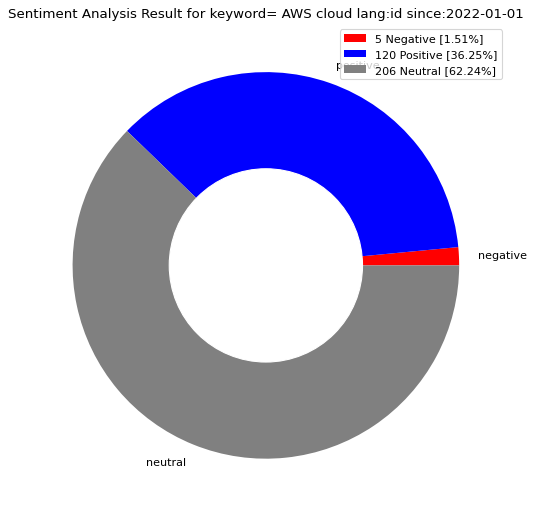

In [ ]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,'sentiment')
pc = pichart
positive = pc['Percentage']['positive']
neutral = pc['Percentage']['neutral']
negative = pc['Percentage']['negative']
pos = pc['Total']['positive']
neu = pc['Total']['neutral']
neg = pc['Total']['negative']
names = pc.index
size = pc['Percentage']

# Create a circle for the center of the plot
labels = [str(neg)+' Negative ['+str(negative)+'%]',
          str(pos)+' Positive ['+str(positive)+'%]' ,
          str(neu)+' Neutral ['+str(neutral)+'%]']

from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=80)

my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=names, colors=['red','blue','gray'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Sentiment Analysis Result for keyword= '+query+'' )
plt.legend(labels)
plt.show()

# **Kursus AWS**

In [ ]:
query = "kursus aws (cloud OR service OR data OR amazon) lang:id until:2022-04-20 since:2022-01-01"
tweets = []
limit = 10000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():

    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content])

df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
df.head()

# to save to csv
df.to_csv('tweets_kursusaws.csv')

In [ ]:
url='https://drive.google.com/file/d/11EueVIHbQi_HmRhxBJN3cppcLDFavqy9/view?usp=sharing'
file_id=url.split('/')[-2]
file_name='https://drive.google.com/uc?id=' + file_id
query = "kursus sql lang:id since:2022-01-01"

kursusAWS = pd.read_csv(file_name)
kursusAWS.head()

,Unnamed: 0,Date,User,Tweet
0,0,2022-04-12 09:20:06+00:00,sevima_official,Kolaborasi SEVIMA dan AWS Hadirkan Kursus Onli...


In [ ]:
kursusAWS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1 non-null      int64 
 1   Date        1 non-null      object
 2   User        1 non-null      object
 3   Tweet       1 non-null      object
dtypes: int64(1), object(3)
memory usage: 160.0+ bytes


In [ ]:
tw_list = kursusAWS

#Cleaning Text (RT, Punctuation etc)

tw_list['text'] = tw_list['Tweet']
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",str(x))
remove_tag = lambda x: re.sub(r'@\S+ '," ",x)
remove_link = lambda x: re.sub(r'http\S+', '', x)

tw_list['Tweet'] = tw_list.Tweet.map(remove_rt).map(remove_tag).map(remove_link)
tw_list['Tweet'] = tw_list.Tweet.str.lower()
tw_list.head()

,Unnamed: 0,Date,User,Tweet,text
0,0,2022-04-12 09:20:06+00:00,sevima_official,kolaborasi sevima dan aws hadirkan kursus onli...,Kolaborasi SEVIMA dan AWS Hadirkan Kursus Onli...


In [ ]:
# Removing [Unnamed:0] and [text]
tw_list.drop(['Unnamed: 0', 'text'], axis=1, inplace=True)

# Removing Null Row
tw_list.dropna(inplace=True)
tw_list.reset_index(drop=True, inplace=True)

# Removing Duplicate row
tw_list.drop_duplicates(inplace = True)

In [ ]:
# Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)

noOfTweet = len(tw_list)
positive = 0
negative = 0
neutral = 0
polarity = 0
# Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in tw_list.iterrows():
  analysis = TextBlob(str(row['Tweet']))
  score = SentimentIntensityAnalyzer().polarity_scores(str(row['Tweet']))
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  if neg > pos:
    tw_list.loc[index, 'sentiment'] = 'negative'
    negative += 1
  elif pos > neg:
    tw_list.loc[index, 'sentiment'] = 'positive'
    positive += 1
  else:
    tw_list.loc[index, 'sentiment'] = 'neutral'
    neutral += 1

  tw_list.loc[index, 'neg'] = neg
  tw_list.loc[index, 'neu'] = neu
  tw_list.loc[index, 'pos'] = pos
  tw_list.loc[index, 'compound'] = comp

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')

In [ ]:
tw_list.head(10)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2022-04-12 09:20:06+00:00,sevima_official,kolaborasi sevima dan aws hadirkan kursus onli...,0.0,0.0,positive,0.0,0.87,0.13,0.126


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list['sentiment']=='negative']
tw_list_positive = tw_list[tw_list['sentiment']=='positive']
tw_list_neutral = tw_list[tw_list['sentiment']=='neutral']

In [ ]:
tw_list_positive.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2022-04-12 09:20:06+00:00,sevima_official,kolaborasi sevima dan aws hadirkan kursus onli...,0.0,0.0,positive,0.0,0.87,0.13,0.126


In [ ]:
tw_list_negative.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound


In [ ]:
tw_list_neutral.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound


In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False, ascending=True)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,'sentiment')

,Total,Percentage
positive,1,100.0


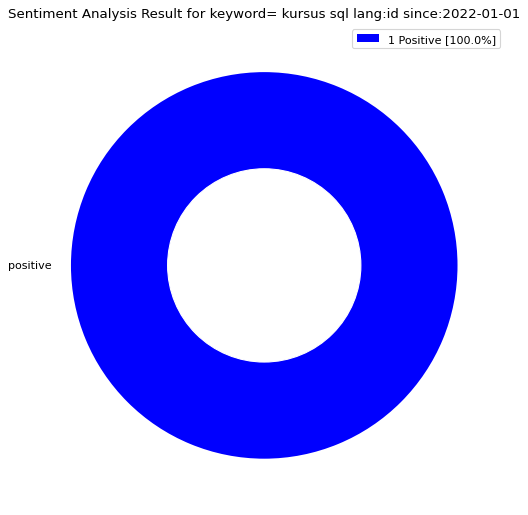

In [ ]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,'sentiment')
pc = pichart
positive = pc['Percentage']['positive']
#neutral = pc['Percentage']['neutral']
#negative = pc['Percentage']['negative']
pos = pc['Total']['positive']
#neu = pc['Total']['neutral']
#neg = pc['Total']['negative']
names = pc.index
size = pc['Percentage']

# Create a circle for the center of the plot
labels = [#str(neg)+' Negative ['+str(negative)+'%]',
          str(pos)+' Positive ['+str(positive)+'%]']
          #str(neu)+' Neutral ['+str(neutral)+'%]']

from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=80)

my_circle = plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=names, colors=['blue'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Sentiment Analysis Result for keyword= '+query+'' )
plt.legend(labels)
plt.show()

# **AWS Course**

In [ ]:
# Jangan di run lagi, soalnya lumayan lama. dataset hasil scraping dah ku save bentuk csv. nanti tinggal pake csv itu buat sentiment analysis

query = "aws course (cloud OR service OR data OR amazon) lang:id until:2022-04-20 since:2022-01-01"
tweets = []
limit = 10000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():

    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content])

df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
df.head()

# to save to csv
df.to_csv('tweets_awscourse.csv')

In [ ]:
url='https://drive.google.com/file/d/1415FQun4tigBmQLM1HGPFqrsDfkuvMLu/view?usp=sharing'
file_id=url.split('/')[-2]
file_name='https://drive.google.com/uc?id=' + file_id
query = "sql course lang:id since:2022-01-01"

AWScourse = pd.read_csv(file_name)
AWScourse.head()

,Unnamed: 0,Date,User,Tweet
0,0,2022-03-11 03:08:03+00:00,manusyaginger,haruh ini course aws cloud pusyeng bgt bnyk na...
1,1,2022-02-08 10:44:34+00:00,mualimnoer,Pengen ikut online course cloud compute and ne...
2,2,2022-01-06 14:37:20+00:00,RashCD91,banyak service yang manage database ni sebenar...


In [ ]:
AWScourse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3 non-null      int64 
 1   Date        3 non-null      object
 2   User        3 non-null      object
 3   Tweet       3 non-null      object
dtypes: int64(1), object(3)
memory usage: 224.0+ bytes


In [ ]:
tw_list = AWScourse

#Cleaning Text (RT, Punctuation etc)

tw_list['text'] = tw_list['Tweet']
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",str(x))
remove_tag = lambda x: re.sub(r'@\S+ '," ",x)
remove_link = lambda x: re.sub(r'http\S+', '', x)

tw_list['Tweet'] = tw_list.Tweet.map(remove_rt).map(remove_tag).map(remove_link)
tw_list['Tweet'] = tw_list.Tweet.str.lower()
tw_list.head()

,Unnamed: 0,Date,User,Tweet,text
0,0,2022-03-11 03:08:03+00:00,manusyaginger,haruh ini course aws cloud pusyeng bgt bnyk na...,haruh ini course aws cloud pusyeng bgt bnyk na...
1,1,2022-02-08 10:44:34+00:00,mualimnoer,pengen ikut online course cloud compute and ne...,Pengen ikut online course cloud compute and ne...
2,2,2022-01-06 14:37:20+00:00,RashCD91,banyak service yang manage database ni sebenar...,banyak service yang manage database ni sebenar...


In [ ]:
# Removing [Unnamed:0] and [text]
tw_list.drop(['Unnamed: 0', 'text'], axis=1, inplace=True)

# Removing Null Row
tw_list.dropna(inplace=True)
tw_list.reset_index(drop=True, inplace=True)

# Removing Duplicate row
tw_list.drop_duplicates(inplace = True)

In [ ]:
# Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)

noOfTweet = len(tw_list)
positive = 0
negative = 0
neutral = 0
polarity = 0
# Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in tw_list.iterrows():
  analysis = TextBlob(str(row['Tweet']))
  score = SentimentIntensityAnalyzer().polarity_scores(str(row['Tweet']))
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  if neg > pos:
    tw_list.loc[index, 'sentiment'] = 'negative'
    negative += 1
  elif pos > neg:
    tw_list.loc[index, 'sentiment'] = 'positive'
    positive += 1
  else:
    tw_list.loc[index, 'sentiment'] = 'neutral'
    neutral += 1

  tw_list.loc[index, 'neg'] = neg
  tw_list.loc[index, 'neu'] = neu
  tw_list.loc[index, 'pos'] = pos
  tw_list.loc[index, 'compound'] = comp

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')

In [ ]:
tw_list.head(10)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2022-03-11 03:08:03+00:00,manusyaginger,haruh ini course aws cloud pusyeng bgt bnyk na...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000
1,2022-02-08 10:44:34+00:00,mualimnoer,pengen ikut online course cloud compute and ne...,0.0,0.0,positive,0.0,0.894,0.106,0.3612
2,2022-01-06 14:37:20+00:00,RashCD91,banyak service yang manage database ni sebenar...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list['sentiment']=='negative']
tw_list_positive = tw_list[tw_list['sentiment']=='positive']
tw_list_neutral = tw_list[tw_list['sentiment']=='neutral']

In [ ]:
tw_list_positive.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
1,2022-02-08 10:44:34+00:00,mualimnoer,pengen ikut online course cloud compute and ne...,0.0,0.0,positive,0.0,0.894,0.106,0.3612


In [ ]:
tw_list_negative.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound


In [ ]:
tw_list_neutral.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2022-03-11 03:08:03+00:00,manusyaginger,haruh ini course aws cloud pusyeng bgt bnyk na...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
2,2022-01-06 14:37:20+00:00,RashCD91,banyak service yang manage database ni sebenar...,0.0,0.0,neutral,0.0,1.0,0.0,0.0


In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False, ascending=True)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,'sentiment')

,Total,Percentage
positive,1,33.33
neutral,2,66.67


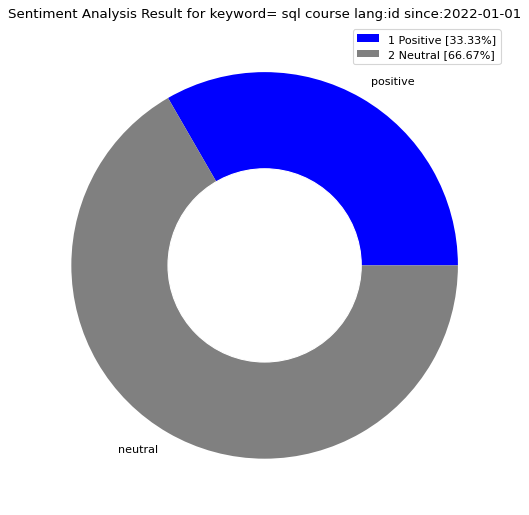

In [ ]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,'sentiment')
pc = pichart
positive = pc['Percentage']['positive']
neutral = pc['Percentage']['neutral']
#negative = pc['Percentage']['negative']
pos = pc['Total']['positive']
neu = pc['Total']['neutral']
#neg = pc['Total']['negative']
names = pc.index
size = pc['Percentage']

# Create a circle for the center of the plot
labels = [#str(neg)+' Negative ['+str(negative)+'%]',
          str(pos)+' Positive ['+str(positive)+'%]' ,
          str(neu)+' Neutral ['+str(neutral)+'%]']

from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=80)

my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=names, colors=['blue','gray'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Sentiment Analysis Result for keyword= '+query+'' )
plt.legend(labels)
plt.show()

# **Bootcamp AWS (Kosong)**

In [ ]:
# Jangan di run lagi, soalnya lumayan lama. dataset hasil scraping dah ku save bentuk csv. nanti tinggal pake csv itu buat sentiment analysis

query = "bootcamp aws (cloud OR service OR data OR amazon) lang:id until:2022-04-20 since:2022-01-01"
tweets = []
limit = 10000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():

    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content])

df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
df.head()

# to save to csv
df.to_csv('tweets_bootcampAWS.csv')

In [ ]:
url='https://drive.google.com/file/d/1f-eCX5Bp8KmhN85AjGVPRFW5zVsw2f31/view?usp=sharing'
file_id=url.split('/')[-2]
file_name='https://drive.google.com/uc?id=' + file_id
query = "bootcamp sql lang:id since:2022-01-01"

bootcampAWS = pd.read_csv(file_name)
bootcampAWS.head()

,Unnamed: 0,Date,User,Tweet


In [ ]:
bootcampAWS.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  0 non-null      object
 1   Date        0 non-null      object
 2   User        0 non-null      object
 3   Tweet       0 non-null      object
dtypes: object(4)
memory usage: 0.0+ bytes


In [ ]:
tw_list = bootcampAWS

#Cleaning Text (RT, Punctuation etc)

tw_list['text'] = tw_list['Tweet']
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",str(x))
remove_tag = lambda x: re.sub(r'@\S+ '," ",x)
remove_link = lambda x: re.sub(r'http\S+', '', x)

tw_list['Tweet'] = tw_list.Tweet.map(remove_rt).map(remove_tag).map(remove_link)
tw_list['Tweet'] = tw_list.Tweet.str.lower()
tw_list.head()

,Unnamed: 0,Date,User,Tweet,text


In [ ]:
# Removing [Unnamed:0] and [text]
tw_list.drop(['Unnamed: 0', 'text'], axis=1, inplace=True)

# Removing Null Row
tw_list.dropna(inplace=True)
tw_list.reset_index(drop=True, inplace=True)

# Removing Duplicate row
tw_list.drop_duplicates(inplace = True)

,Date,User,Tweet


In [ ]:
# Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)

noOfTweet = len(tw_list)
positive = 0
negative = 0
neutral = 0
polarity = 0
# Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in tw_list.iterrows():
  analysis = TextBlob(str(row['Tweet']))
  score = SentimentIntensityAnalyzer().polarity_scores(str(row['Tweet']))
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  if neg > pos:
    tw_list.loc[index, 'sentiment'] = 'negative'
    negative += 1
  elif pos > neg:
    tw_list.loc[index, 'sentiment'] = 'positive'
    positive += 1
  else:
    tw_list.loc[index, 'sentiment'] = 'neutral'
    neutral += 1

  tw_list.loc[index, 'neg'] = neg
  tw_list.loc[index, 'neu'] = neu
  tw_list.loc[index, 'pos'] = pos
  tw_list.loc[index, 'compound'] = comp

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')

ValueError: ignored

In [ ]:
tw_list.head(10)

In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list['sentiment']=='negative']
tw_list_positive = tw_list[tw_list['sentiment']=='positive']
tw_list_neutral = tw_list[tw_list['sentiment']=='neutral']

In [ ]:
tw_list_positive.head(3)

In [ ]:
tw_list_negative.head(3)

In [ ]:
tw_list_neutral.head(3)

In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False, ascending=True)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,'sentiment')

In [ ]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,'sentiment')
pc = pichart
positive = pc['Percentage']['positive']
neutral = pc['Percentage']['neutral']
#negative = pc['Percentage']['negative']
pos = pc['Total']['positive']
neu = pc['Total']['neutral']
#neg = pc['Total']['negative']
names = pc.index
size = pc['Percentage']

# Create a circle for the center of the plot
labels = [#str(neg)+' Negative ['+str(negative)+'%]',
          str(pos)+' Positive ['+str(positive)+'%]' ,
          str(neu)+' Neutral ['+str(neutral)+'%]']

from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=80)

my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=names, colors=['blue','gray'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Sentiment Analysis Result for keyword= '+query+'' )
plt.legend(labels)
plt.show()

# **Training AWS**

In [ ]:
# Jangan di run lagi, soalnya lumayan lama. dataset hasil scraping dah ku save bentuk csv. nanti tinggal pake csv itu buat sentiment analysis

query = "training aws (cloud OR service OR data OR amazon) lang:id until:2022-04-20 since:2022-01-01"
tweets = []
limit = 10000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():

    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content])

df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
df.head()

# to save to csv
df.to_csv('tweets_trainingAWS.csv')

In [ ]:
url='https://drive.google.com/file/d/1HNmLk_qGe99HniAWq2zKpz3HcsE3mLU1/view?usp=sharing'
file_id=url.split('/')[-2]
file_name='https://drive.google.com/uc?id=' + file_id
query = "training sql lang:id since:2022-01-01"

trainingAWS = pd.read_csv(file_name)
trainingAWS.head()

,Unnamed: 0,Date,User,Tweet
0,0,2022-04-13 17:42:22+00:00,fchw33,@xfmx_12 @MirvanNovanto Sekarang mah mending a...
1,1,2022-03-23 04:14:03+00:00,ruliemaulana,https://t.co/fPNJQsFmd7\n\nIni problem tiap ba...
2,2,2022-02-15 03:13:00+00:00,dennyalfani,AWS Cloud and IT Fundamentals training\nAWS re...


In [ ]:
trainingAWS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3 non-null      int64 
 1   Date        3 non-null      object
 2   User        3 non-null      object
 3   Tweet       3 non-null      object
dtypes: int64(1), object(3)
memory usage: 224.0+ bytes


In [ ]:
tw_list = trainingAWS

#Cleaning Text (RT, Punctuation etc)

tw_list['text'] = tw_list['Tweet']
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",str(x))
remove_tag = lambda x: re.sub(r'@\S+ '," ",x)
remove_link = lambda x: re.sub(r'http\S+', '', x)

tw_list['Tweet'] = tw_list.Tweet.map(remove_rt).map(remove_tag).map(remove_link)
tw_list['Tweet'] = tw_list.Tweet.str.lower()
tw_list.head()

,Unnamed: 0,Date,User,Tweet,text
0,0,2022-04-13 17:42:22+00:00,fchw33,sekarang mah mending alokasiin budget buat m...,@xfmx_12 @MirvanNovanto Sekarang mah mending a...
1,1,2022-03-23 04:14:03+00:00,ruliemaulana,\n\nini problem tiap bahas ai.\nselalu bicara ...,https://t.co/fPNJQsFmd7\n\nIni problem tiap ba...
2,2,2022-02-15 03:13:00+00:00,dennyalfani,aws cloud and it fundamentals training\naws re...,AWS Cloud and IT Fundamentals training\nAWS re...


In [ ]:
# Removing [Unnamed:0] and [text]
tw_list.drop(['Unnamed: 0', 'text'], axis=1, inplace=True)

# Removing Null Row
tw_list.dropna(inplace=True)
tw_list.reset_index(drop=True, inplace=True)

# Removing Duplicate row
tw_list.drop_duplicates(inplace = True)

In [ ]:
# Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)

noOfTweet = len(tw_list)
positive = 0
negative = 0
neutral = 0
polarity = 0
# Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in tw_list.iterrows():
  analysis = TextBlob(str(row['Tweet']))
  score = SentimentIntensityAnalyzer().polarity_scores(str(row['Tweet']))
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  if neg > pos:
    tw_list.loc[index, 'sentiment'] = 'negative'
    negative += 1
  elif pos > neg:
    tw_list.loc[index, 'sentiment'] = 'positive'
    positive += 1
  else:
    tw_list.loc[index, 'sentiment'] = 'neutral'
    neutral += 1

  tw_list.loc[index, 'neg'] = neg
  tw_list.loc[index, 'neu'] = neu
  tw_list.loc[index, 'pos'] = pos
  tw_list.loc[index, 'compound'] = comp

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')

In [ ]:
tw_list.head(10)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2022-04-13 17:42:22+00:00,fchw33,sekarang mah mending alokasiin budget buat m...,-0.1,0.100,positive,0.000,0.954,0.046,0.1779
1,2022-03-23 04:14:03+00:00,ruliemaulana,\n\nini problem tiap bahas ai.\nselalu bicara ...,0.0,0.000,positive,0.059,0.833,0.107,0.2960
2,2022-02-15 03:13:00+00:00,dennyalfani,aws cloud and it fundamentals training\naws re...,0.0,0.125,positive,0.000,0.965,0.035,0.0516


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list['sentiment']=='negative']
tw_list_positive = tw_list[tw_list['sentiment']=='positive']
tw_list_neutral = tw_list[tw_list['sentiment']=='neutral']

In [ ]:
tw_list_positive.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2022-04-13 17:42:22+00:00,fchw33,sekarang mah mending alokasiin budget buat m...,-0.1,0.100,positive,0.000,0.954,0.046,0.1779
1,2022-03-23 04:14:03+00:00,ruliemaulana,\n\nini problem tiap bahas ai.\nselalu bicara ...,0.0,0.000,positive,0.059,0.833,0.107,0.2960
2,2022-02-15 03:13:00+00:00,dennyalfani,aws cloud and it fundamentals training\naws re...,0.0,0.125,positive,0.000,0.965,0.035,0.0516


In [ ]:
tw_list_negative.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound


In [ ]:
tw_list_neutral.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound


In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False, ascending=True)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,'sentiment')

,Total,Percentage
positive,3,100.0


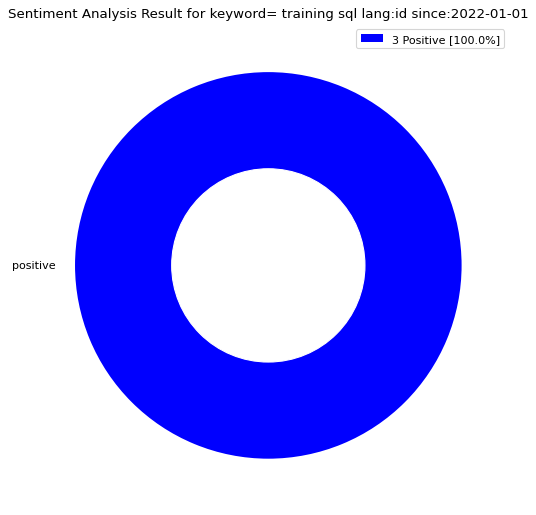

In [ ]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,'sentiment')
pc = pichart
positive = pc['Percentage']['positive']
#neutral = pc['Percentage']['neutral']
#negative = pc['Percentage']['negative']

pos = pc['Total']['positive']
#neu = pc['Total']['neutral']
#neg = pc['Total']['negative']
names = pc.index
size = pc['Percentage']

# Create a circle for the center of the plot
labels = [#str(neg)+' Negative ['+str(negative)+'%]',
          str(pos)+' Positive ['+str(positive)+'%]',
          str(neu)+' Neutral ['+str(neutral)+'%]']

from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=80)

my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=names, colors=['blue','gray'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Sentiment Analysis Result for keyword= '+query+'' )
plt.legend(labels)
plt.show()

# **Kelas AWS**

In [ ]:
# Jangan di run lagi, soalnya lumayan lama. dataset hasil scraping dah ku save bentuk csv. nanti tinggal pake csv itu buat sentiment analysis

query = "kelas aws (cloud OR service OR data OR amazon) lang:id until:2022-04-20 since:2022-01-01"
tweets = []
limit = 10000

for tweet in sntwitter.TwitterSearchScraper(query).get_items():

    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content])

df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
df.head()

# to save to csv
df.to_csv('tweets_kelasAWS.csv')

In [ ]:
url='https://drive.google.com/file/d/1-wmYfyBTjhSCpxLS9HB5taqWivrX3nbf/view?usp=sharing'
file_id=url.split('/')[-2]
file_name='https://drive.google.com/uc?id=' + file_id
query = "kelas sql lang:id since:2022-01-01"

kelasAWS = pd.read_csv(file_name)
kelasAWS.head()

,Unnamed: 0,Date,User,Tweet
0,0,2022-04-04 10:34:15+00:00,alexgufron,@naningptr Bukan dek hehehe\nIni yg kelas Proa...
1,1,2022-03-31 04:53:53+00:00,eliterycloud,Elitery sudah berpengalaman dan telah menjadi ...
2,2,2022-03-27 15:39:45+00:00,dicoding,@androiddev_tng @codingfess Ada dong💯\n\nDicod...
3,3,2022-03-18 05:44:22+00:00,MohLutfiFauzi,Sertifikat Kelulusan kelas Cloud Practitioner ...
4,4,2022-02-09 05:47:32+00:00,fahrihussaeni_,setelah selesai di kelas Cloud Practitioner Es...


In [ ]:
kelasAWS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10 non-null     int64 
 1   Date        10 non-null     object
 2   User        10 non-null     object
 3   Tweet       10 non-null     object
dtypes: int64(1), object(3)
memory usage: 448.0+ bytes


In [ ]:
tw_list = kelasAWS

#Cleaning Text (RT, Punctuation etc)

tw_list['text'] = tw_list['Tweet']
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",str(x))
remove_tag = lambda x: re.sub(r'@\S+ '," ",x)
remove_link = lambda x: re.sub(r'http\S+', '', x)

tw_list['Tweet'] = tw_list.Tweet.map(remove_rt).map(remove_tag).map(remove_link)
tw_list['Tweet'] = tw_list.Tweet.str.lower()
tw_list.head()

,Unnamed: 0,Date,User,Tweet,text
0,0,2022-04-04 10:34:15+00:00,alexgufron,bukan dek hehehe\nini yg kelas proa 😁\nyg da...,@naningptr Bukan dek hehehe\nIni yg kelas Proa...
1,1,2022-03-31 04:53:53+00:00,eliterycloud,elitery sudah berpengalaman dan telah menjadi ...,Elitery sudah berpengalaman dan telah menjadi ...
2,2,2022-03-27 15:39:45+00:00,dicoding,ada dong💯\n\ndicoding punya kelas belajar da...,@androiddev_tng @codingfess Ada dong💯\n\nDicod...
3,3,2022-03-18 05:44:22+00:00,MohLutfiFauzi,sertifikat kelulusan kelas cloud practitioner ...,Sertifikat Kelulusan kelas Cloud Practitioner ...
4,4,2022-02-09 05:47:32+00:00,fahrihussaeni_,setelah selesai di kelas cloud practitioner es...,setelah selesai di kelas Cloud Practitioner Es...


In [ ]:
# Removing [Unnamed:0] and [text]
tw_list.drop(['Unnamed: 0', 'text'], axis=1, inplace=True)

# Removing Null Row
tw_list.dropna(inplace=True)
tw_list.reset_index(drop=True, inplace=True)

# Removing Duplicate row
tw_list.drop_duplicates(inplace = True)

In [ ]:
# Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)

noOfTweet = len(tw_list)
positive = 0
negative = 0
neutral = 0
polarity = 0
# Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in tw_list.iterrows():
  analysis = TextBlob(str(row['Tweet']))
  score = SentimentIntensityAnalyzer().polarity_scores(str(row['Tweet']))
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  if neg > pos:
    tw_list.loc[index, 'sentiment'] = 'negative'
    negative += 1
  elif pos > neg:
    tw_list.loc[index, 'sentiment'] = 'positive'
    positive += 1
  else:
    tw_list.loc[index, 'sentiment'] = 'neutral'
    neutral += 1

  tw_list.loc[index, 'neg'] = neg
  tw_list.loc[index, 'neu'] = neu
  tw_list.loc[index, 'pos'] = pos
  tw_list.loc[index, 'compound'] = comp

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')

In [ ]:
tw_list.head(10)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2022-04-04 10:34:15+00:00,alexgufron,bukan dek hehehe\nini yg kelas proa 😁\nyg da...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000
1,2022-03-31 04:53:53+00:00,eliterycloud,elitery sudah berpengalaman dan telah menjadi ...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000
2,2022-03-27 15:39:45+00:00,dicoding,ada dong💯\n\ndicoding punya kelas belajar da...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000
3,2022-03-18 05:44:22+00:00,MohLutfiFauzi,sertifikat kelulusan kelas cloud practitioner ...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000
4,2022-02-09 05:47:32+00:00,fahrihussaeni_,setelah selesai di kelas cloud practitioner es...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000
5,2022-02-07 12:50:11+00:00,fahrihussaeni_,bang fahrel setelah lulus di kelas cloud prac...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000
6,2022-01-30 10:47:47+00:00,akusukadoa,makasih atas kelas gratis cloud practitioner ...,0.0,0.0,positive,0.0,0.902,0.098,0.0516
7,2022-01-20 12:21:01+00:00,SydAlawie,baru aja nyelesain kelas cloud practitioner es...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000
8,2022-01-07 05:57:37+00:00,afriiizal,sertifikat kelulusan kelas cloud practitioner ...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000
9,2022-01-06 09:12:34+00:00,Reyza04,sertifikat kelulusan kelas cloud practitioner ...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list['sentiment']=='negative']
tw_list_positive = tw_list[tw_list['sentiment']=='positive']
tw_list_neutral = tw_list[tw_list['sentiment']=='neutral']

In [ ]:
tw_list_positive.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
6,2022-01-30 10:47:47+00:00,akusukadoa,makasih atas kelas gratis cloud practitioner ...,0.0,0.0,positive,0.0,0.902,0.098,0.0516


In [ ]:
tw_list_negative.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound


In [ ]:
tw_list_neutral.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2022-04-04 10:34:15+00:00,alexgufron,bukan dek hehehe\nini yg kelas proa 😁\nyg da...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
1,2022-03-31 04:53:53+00:00,eliterycloud,elitery sudah berpengalaman dan telah menjadi ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
2,2022-03-27 15:39:45+00:00,dicoding,ada dong💯\n\ndicoding punya kelas belajar da...,0.0,0.0,neutral,0.0,1.0,0.0,0.0


In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False, ascending=True)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,'sentiment')

,Total,Percentage
positive,1,10.0
neutral,9,90.0


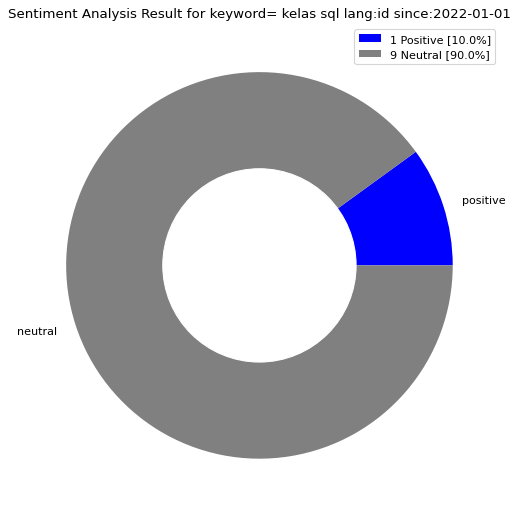

In [ ]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,'sentiment')
pc = pichart
positive = pc['Percentage']['positive']
neutral = pc['Percentage']['neutral']
#negative = pc['Percentage']['negative']
pos = pc['Total']['positive']
neu = pc['Total']['neutral']
#neg = pc['Total']['negative']
names = pc.index
size = pc['Percentage']

# Create a circle for the center of the plot
labels = [#str(neg)+' Negative ['+str(negative)+'%]',
          str(pos)+' Positive ['+str(positive)+'%]' ,
          str(neu)+' Neutral ['+str(neutral)+'%]']

from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=80)

my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=names, colors=['blue','gray'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Sentiment Analysis Result for keyword= '+query+'' )
plt.legend(labels)
plt.show()

# **Les AWS (Kosong)**

In [ ]:
# Jangan di run lagi, soalnya lumayan lama. dataset hasil scraping dah ku save bentuk csv. nanti tinggal pake csv itu buat sentiment analysis

query = "les aws (cloud OR service OR data OR amazon) lang:id until:2022-04-20 since:2022-01-01"
tweets = []
limit = 10000

for tweet in sntwitter.TwitterSearchScraper(query).get_items():

    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content])

df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
df.head()

# to save to csv
df.to_csv('tweets_lesAWS.csv')

In [ ]:
url='https://drive.google.com/file/d/1tBFJ2zE7cv0G0O90BL6fyTNfc0H8p653/view?usp=sharing'
file_id=url.split('/')[-2]
file_name='https://drive.google.com/uc?id=' + file_id
query = "les sql lang:id since:2022-01-01"

lesAWS = pd.read_csv(file_name)
lesAWS.head()

,Unnamed: 0,Date,User,Tweet


In [ ]:
lesAWS.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  0 non-null      object
 1   Date        0 non-null      object
 2   User        0 non-null      object
 3   Tweet       0 non-null      object
dtypes: object(4)
memory usage: 0.0+ bytes


In [ ]:
tw_list = lesAWS

#Cleaning Text (RT, Punctuation etc)

tw_list['text'] = tw_list['Tweet']
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",str(x))
remove_tag = lambda x: re.sub(r'@\S+ '," ",x)
remove_link = lambda x: re.sub(r'http\S+', '', x)

tw_list['Tweet'] = tw_list.Tweet.map(remove_rt).map(remove_tag).map(remove_link)
tw_list['Tweet'] = tw_list.Tweet.str.lower()
tw_list.head()

,Unnamed: 0,Date,User,Tweet,text


In [ ]:
# Removing [Unnamed:0] and [text]
tw_list.drop(['Unnamed: 0', 'text'], axis=1, inplace=True)

# Removing Null Row
tw_list.dropna(inplace=True)
tw_list.reset_index(drop=True, inplace=True)

# Removing Duplicate row
tw_list.drop_duplicates(inplace = True)

,Date,User,Tweet


In [ ]:
# Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)

noOfTweet = len(tw_list)
positive = 0
negative = 0
neutral = 0
polarity = 0
# Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in tw_list.iterrows():
  analysis = TextBlob(str(row['Tweet']))
  score = SentimentIntensityAnalyzer().polarity_scores(str(row['Tweet']))
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  if neg > pos:
    tw_list.loc[index, 'sentiment'] = 'negative'
    negative += 1
  elif pos > neg:
    tw_list.loc[index, 'sentiment'] = 'positive'
    positive += 1
  else:
    tw_list.loc[index, 'sentiment'] = 'neutral'
    neutral += 1

  tw_list.loc[index, 'neg'] = neg
  tw_list.loc[index, 'neu'] = neu
  tw_list.loc[index, 'pos'] = pos
  tw_list.loc[index, 'compound'] = comp

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')

ValueError: ignored

In [ ]:
tw_list.head(10)

In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list['sentiment']=='negative']
tw_list_positive = tw_list[tw_list['sentiment']=='positive']
tw_list_neutral = tw_list[tw_list['sentiment']=='neutral']

In [ ]:
tw_list_positive.head(3)

In [ ]:
tw_list_negative.head(3)

In [ ]:
tw_list_neutral.head(3)

In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False, ascending=True)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,'sentiment')

In [ ]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,'sentiment')
pc = pichart

neutral = pc['Percentage']['neutral']
#negative = pc['Percentage']['negative']

neu = pc['Total']['neutral']
#neg = pc['Total']['negative']
names = pc.index
size = pc['Percentage']

# Create a circle for the center of the plot
labels = [#str(neg)+' Negative ['+str(negative)+'%]',
          str(neu)+' Neutral ['+str(neutral)+'%]']

from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=80)

my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=names, colors=['gray'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Sentiment Analysis Result for keyword= '+query+'' )
plt.legend(labels)
plt.show()

# **Pelatihan AWS**

In [ ]:
# Jangan di run lagi, soalnya lumayan lama. dataset hasil scraping dah ku save bentuk csv. nanti tinggal pake csv itu buat sentiment analysis

query = "pelatihan aws (cloud OR service OR data OR amazon) lang:id until:2022-04-20 since:2022-01-01"
tweets = []
limit = 10000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():

    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content])

df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
df.head()

# to save to csv
df.to_csv('tweets_pelatihanAWS.csv')

In [ ]:
url='https://drive.google.com/file/d/19BNbVcAorwXkLxf798dXRJ2l2zI8ABeP/view?usp=sharing'
file_id=url.split('/')[-2]
file_name='https://drive.google.com/uc?id=' + file_id
query = "pelatihan sql lang:id since:2022-01-01"

pelatihanAWS = pd.read_csv(file_name)
pelatihanAWS.head()

,Unnamed: 0,Date,User,Tweet
0,0,2022-04-08 06:19:04+00:00,Lip6Tekno,Orbit Future Academy dan AWS Luncurkan Program...
1,1,2022-04-07 12:00:56+00:00,KATADATAcoid,AWS menggelar pelatihan digital kepada masyara...
2,2,2022-04-07 09:32:17+00:00,MSNindonesia,"Program AWS re/Start Beri Pelatihan Kerja ""Clo..."
3,3,2022-04-07 09:20:33+00:00,lowkerpr,Orbit Future Academy meluncurkan program pelat...
4,4,2022-04-07 09:06:04+00:00,KompasEkonomi,"Program AWS re/Start Beri Pelatihan Kerja ""Clo..."


In [ ]:
pelatihanAWS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  19 non-null     int64 
 1   Date        19 non-null     object
 2   User        19 non-null     object
 3   Tweet       19 non-null     object
dtypes: int64(1), object(3)
memory usage: 736.0+ bytes


In [ ]:
tw_list = pelatihanAWS

#Cleaning Text (RT, Punctuation etc)

tw_list['text'] = tw_list['Tweet']
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",str(x))
remove_tag = lambda x: re.sub(r'@\S+ '," ",x)
remove_link = lambda x: re.sub(r'http\S+', '', x)

tw_list['Tweet'] = tw_list.Tweet.map(remove_rt).map(remove_tag).map(remove_link)
tw_list['Tweet'] = tw_list.Tweet.str.lower()
tw_list.head()

,Unnamed: 0,Date,User,Tweet,text
0,0,2022-04-08 06:19:04+00:00,Lip6Tekno,orbit future academy dan aws luncurkan program...,Orbit Future Academy dan AWS Luncurkan Program...
1,1,2022-04-07 12:00:56+00:00,KATADATAcoid,aws menggelar pelatihan digital kepada masyara...,AWS menggelar pelatihan digital kepada masyara...
2,2,2022-04-07 09:32:17+00:00,MSNindonesia,"program aws re/start beri pelatihan kerja ""clo...","Program AWS re/Start Beri Pelatihan Kerja ""Clo..."
3,3,2022-04-07 09:20:33+00:00,lowkerpr,orbit future academy meluncurkan program pelat...,Orbit Future Academy meluncurkan program pelat...
4,4,2022-04-07 09:06:04+00:00,KompasEkonomi,"program aws re/start beri pelatihan kerja ""clo...","Program AWS re/Start Beri Pelatihan Kerja ""Clo..."


In [ ]:
# Removing [Unnamed:0] and [text]
tw_list.drop(['Unnamed: 0', 'text'], axis=1, inplace=True)

# Removing Null Row
tw_list.dropna(inplace=True)
tw_list.reset_index(drop=True, inplace=True)

# Removing Duplicate row
tw_list.drop_duplicates(inplace = True)

In [ ]:
# Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)

noOfTweet = len(tw_list)
positive = 0
negative = 0
neutral = 0
polarity = 0
# Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in tw_list.iterrows():
  analysis = TextBlob(str(row['Tweet']))
  score = SentimentIntensityAnalyzer().polarity_scores(str(row['Tweet']))
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  if neg > pos:
    tw_list.loc[index, 'sentiment'] = 'negative'
    negative += 1
  elif pos > neg:
    tw_list.loc[index, 'sentiment'] = 'positive'
    positive += 1
  else:
    tw_list.loc[index, 'sentiment'] = 'neutral'
    neutral += 1

  tw_list.loc[index, 'neg'] = neg
  tw_list.loc[index, 'neu'] = neu
  tw_list.loc[index, 'pos'] = pos
  tw_list.loc[index, 'compound'] = comp

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')

In [ ]:
tw_list.head(10)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2022-04-08 06:19:04+00:00,Lip6Tekno,orbit future academy dan aws luncurkan program...,0.00,0.125,neutral,0.0,1.000,0.000,0.0000
1,2022-04-07 12:00:56+00:00,KATADATAcoid,aws menggelar pelatihan digital kepada masyara...,-0.05,0.300,positive,0.0,0.928,0.072,0.1779
2,2022-04-07 09:32:17+00:00,MSNindonesia,"program aws re/start beri pelatihan kerja ""clo...",0.00,0.000,positive,0.0,0.909,0.091,0.0516
3,2022-04-07 09:20:33+00:00,lowkerpr,orbit future academy meluncurkan program pelat...,0.00,0.125,positive,0.0,0.941,0.059,0.0516
4,2022-04-07 09:06:04+00:00,KompasEkonomi,"program aws re/start beri pelatihan kerja ""clo...",0.00,0.000,positive,0.0,0.909,0.091,0.0516
5,2022-04-01 16:08:46+00:00,aawiseau,gw pernah ikut pelatihan dts pas 2020 akhir ka...,0.50,0.500,positive,0.0,0.919,0.081,0.4404
6,2022-04-01 09:46:03+00:00,dchyntiabella,"atasi defisit talenta xihital, kominfo gaet am...",0.00,0.000,positive,0.0,0.880,0.120,0.3400
7,2022-04-01 09:27:47+00:00,s1b4d,kementerian bekerja sama dengan amazon web se...,0.00,0.000,positive,0.0,0.934,0.066,0.1779
8,2022-04-01 08:56:20+00:00,DS_yantie,kementerian bekerja sama dengan amazon web se...,0.00,0.000,positive,0.0,0.943,0.057,0.1779
9,2022-03-31 15:38:40+00:00,Menata_Laku,kominfo bekerja sama dengan amazon web service...,0.00,0.000,positive,0.0,0.943,0.057,0.1779


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list['sentiment']=='negative']
tw_list_positive = tw_list[tw_list['sentiment']=='positive']
tw_list_neutral = tw_list[tw_list['sentiment']=='neutral']

In [ ]:
tw_list_positive.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
1,2022-04-07 12:00:56+00:00,KATADATAcoid,aws menggelar pelatihan digital kepada masyara...,-0.05,0.300,positive,0.0,0.928,0.072,0.1779
2,2022-04-07 09:32:17+00:00,MSNindonesia,"program aws re/start beri pelatihan kerja ""clo...",0.00,0.000,positive,0.0,0.909,0.091,0.0516
3,2022-04-07 09:20:33+00:00,lowkerpr,orbit future academy meluncurkan program pelat...,0.00,0.125,positive,0.0,0.941,0.059,0.0516


In [ ]:
tw_list_negative.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound


In [ ]:
tw_list_neutral.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2022-04-08 06:19:04+00:00,Lip6Tekno,orbit future academy dan aws luncurkan program...,0.0,0.125,neutral,0.0,1.0,0.0,0.0
15,2022-02-13 14:40:18+00:00,DTS_kominfo,"digiers, penasaran bagaimana cara pengunaan aw...",0.0,0.000,neutral,0.0,1.0,0.0,0.0
16,2022-02-08 14:08:34+00:00,tifandotme,digitalent sepertinya membuka lagi pelatihan f...,0.0,0.000,neutral,0.0,1.0,0.0,0.0


In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False, ascending=True)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,'sentiment')

,Total,Percentage
neutral,3,15.79
positive,16,84.21


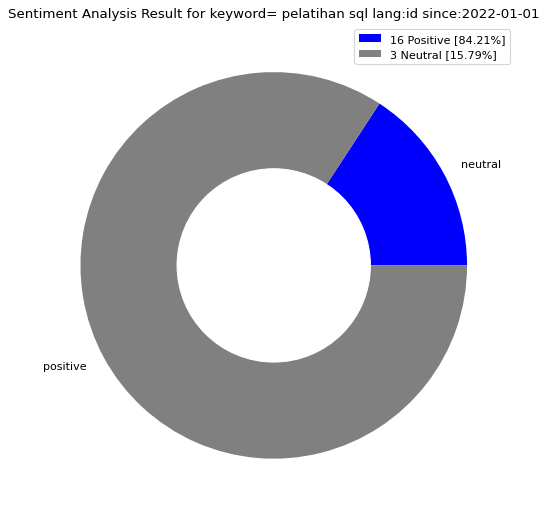

In [ ]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,'sentiment')
pc = pichart
positive = pc['Percentage']['positive']
neutral = pc['Percentage']['neutral']
#negative = pc['Percentage']['negative']
pos = pc['Total']['positive']
neu = pc['Total']['neutral']
#neg = pc['Total']['negative']
names = pc.index
size = pc['Percentage']

# Create a circle for the center of the plot
labels = [#str(neg)+' Negative ['+str(negative)+'%]']
          str(pos)+' Positive ['+str(positive)+'%]' ,
          str(neu)+' Neutral ['+str(neutral)+'%]']

from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=80)

my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=names, colors=['blue','gray'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Sentiment Analysis Result for keyword= '+query+'' )
plt.legend(labels)
plt.show()

# **Belajar AWS**

In [ ]:
# Jangan di run lagi, soalnya lumayan lama. dataset hasil scraping dah ku save bentuk csv. nanti tinggal pake csv itu buat sentiment analysis

query = "belajar aws (cloud OR service OR data OR amazon) lang:id until:2022-04-20 since:2022-01-01"
tweets = []
limit = 10000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():

    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content])

df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
df.head()

# to save to csv
df.to_csv('tweets_belajarAWS.csv')

In [ ]:
url='https://drive.google.com/file/d/1hmXLHjVVCyIWPmp88SJkGCRcYVRNaghb/view?usp=sharing'
file_id=url.split('/')[-2]
file_name='https://drive.google.com/uc?id=' + file_id
query = "belajar sql lang:id since:2022-01-01"

belajarAWS = pd.read_csv(file_name)
belajarAWS.head()

,Unnamed: 0,Date,User,Tweet
0,0,2022-04-17 13:52:41+00:00,1417ian,"@onnowpurbo Pak onno, utk belajar cyber securi..."
1,1,2022-04-07 10:21:29+00:00,dauphinoir,Abis gue fully certified pengen belajar cloud ...
2,2,2022-03-28 04:23:34+00:00,iamgymie,Haloo Developers!\nMau tahu cara mendeteksi in...
3,3,2022-03-27 15:39:45+00:00,dicoding,@androiddev_tng @codingfess Ada dong💯\n\nDicod...
4,4,2022-03-22 04:17:46+00:00,danangan,Belajar AWS biar bisa jadi cloud engineer


In [ ]:
belajarAWS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18 non-null     int64 
 1   Date        18 non-null     object
 2   User        18 non-null     object
 3   Tweet       18 non-null     object
dtypes: int64(1), object(3)
memory usage: 704.0+ bytes


In [ ]:
tw_list = belajarAWS

#Cleaning Text (RT, Punctuation etc)

tw_list['text'] = tw_list['Tweet']
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",str(x))
remove_tag = lambda x: re.sub(r'@\S+ '," ",x)
remove_link = lambda x: re.sub(r'http\S+', '', x)

tw_list['Tweet'] = tw_list.Tweet.map(remove_rt).map(remove_tag).map(remove_link)
tw_list['Tweet'] = tw_list.Tweet.str.lower()
tw_list.head()

,Unnamed: 0,Date,User,Tweet,text
0,0,2022-04-17 13:52:41+00:00,1417ian,"pak onno, utk belajar cyber security perlu be...","@onnowpurbo Pak onno, utk belajar cyber securi..."
1,1,2022-04-07 10:21:29+00:00,dauphinoir,abis gue fully certified pengen belajar cloud ...,Abis gue fully certified pengen belajar cloud ...
2,2,2022-03-28 04:23:34+00:00,iamgymie,haloo developers!\nmau tahu cara mendeteksi in...,Haloo Developers!\nMau tahu cara mendeteksi in...
3,3,2022-03-27 15:39:45+00:00,dicoding,ada dong💯\n\ndicoding punya kelas belajar da...,@androiddev_tng @codingfess Ada dong💯\n\nDicod...
4,4,2022-03-22 04:17:46+00:00,danangan,belajar aws biar bisa jadi cloud engineer,Belajar AWS biar bisa jadi cloud engineer


In [ ]:
# Removing [Unnamed:0] and [text]
tw_list.drop(['Unnamed: 0', 'text'], axis=1, inplace=True)

# Removing Null Row
tw_list.dropna(inplace=True)
tw_list.reset_index(drop=True, inplace=True)

# Removing Duplicate row
tw_list.drop_duplicates(inplace = True)

In [ ]:
# Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)

noOfTweet = len(tw_list)
positive = 0
negative = 0
neutral = 0
polarity = 0
# Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in tw_list.iterrows():
  analysis = TextBlob(str(row['Tweet']))
  score = SentimentIntensityAnalyzer().polarity_scores(str(row['Tweet']))
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  if neg > pos:
    tw_list.loc[index, 'sentiment'] = 'negative'
    negative += 1
  elif pos > neg:
    tw_list.loc[index, 'sentiment'] = 'positive'
    positive += 1
  else:
    tw_list.loc[index, 'sentiment'] = 'neutral'
    neutral += 1

  tw_list.loc[index, 'neg'] = neg
  tw_list.loc[index, 'neu'] = neu
  tw_list.loc[index, 'pos'] = pos
  tw_list.loc[index, 'compound'] = comp

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')

In [ ]:
tw_list.head(10)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2022-04-17 13:52:41+00:00,1417ian,"pak onno, utk belajar cyber security perlu be...",0.0,0.00,positive,0.000,0.854,0.146,0.3400
1,2022-04-07 10:21:29+00:00,dauphinoir,abis gue fully certified pengen belajar cloud ...,0.0,0.00,neutral,0.000,1.000,0.000,0.0000
2,2022-03-28 04:23:34+00:00,iamgymie,haloo developers!\nmau tahu cara mendeteksi in...,0.8,0.90,positive,0.171,0.585,0.244,0.5411
3,2022-03-27 15:39:45+00:00,dicoding,ada dong💯\n\ndicoding punya kelas belajar da...,0.0,0.00,neutral,0.000,1.000,0.000,0.0000
4,2022-03-22 04:17:46+00:00,danangan,belajar aws biar bisa jadi cloud engineer,0.0,0.00,neutral,0.000,1.000,0.000,0.0000
5,2022-03-21 13:47:14+00:00,bismiansyah,capek2 belajar aws sama azure. ternyata jadi ...,0.0,0.00,neutral,0.000,1.000,0.000,0.0000
6,2022-03-20 12:43:47+00:00,arhcha,clouds engineering specialist 😭😭😭😭\n\ngua mera...,0.0,0.00,neutral,0.000,1.000,0.000,0.0000
7,2022-03-18 05:44:22+00:00,MohLutfiFauzi,sertifikat kelulusan kelas cloud practitioner ...,0.0,0.00,neutral,0.000,1.000,0.000,0.0000
8,2022-02-26 03:22:06+00:00,adi_user45,amazon web service sebagai salah satu cloud pr...,0.0,0.00,positive,0.000,0.904,0.096,0.3400
9,2022-02-23 10:55:20+00:00,TopKarir,buat kamu yang mau belajar lebih dalam seputar...,0.0,0.75,positive,0.000,0.925,0.075,0.2263


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list['sentiment']=='negative']
tw_list_positive = tw_list[tw_list['sentiment']=='positive']
tw_list_neutral = tw_list[tw_list['sentiment']=='neutral']

In [ ]:
tw_list_positive.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2022-04-17 13:52:41+00:00,1417ian,"pak onno, utk belajar cyber security perlu be...",0.0,0.0,positive,0.000,0.854,0.146,0.3400
2,2022-03-28 04:23:34+00:00,iamgymie,haloo developers!\nmau tahu cara mendeteksi in...,0.8,0.9,positive,0.171,0.585,0.244,0.5411
8,2022-02-26 03:22:06+00:00,adi_user45,amazon web service sebagai salah satu cloud pr...,0.0,0.0,positive,0.000,0.904,0.096,0.3400


In [ ]:
tw_list_negative.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound


In [ ]:
tw_list_neutral.head(3)

,Date,User,Tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
1,2022-04-07 10:21:29+00:00,dauphinoir,abis gue fully certified pengen belajar cloud ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
3,2022-03-27 15:39:45+00:00,dicoding,ada dong💯\n\ndicoding punya kelas belajar da...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
4,2022-03-22 04:17:46+00:00,danangan,belajar aws biar bisa jadi cloud engineer,0.0,0.0,neutral,0.0,1.0,0.0,0.0


In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False, ascending=True)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,'sentiment')

,Total,Percentage
positive,7,38.89
neutral,11,61.11


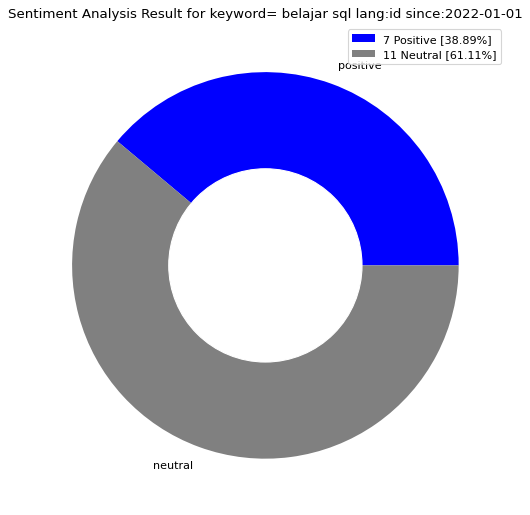

In [ ]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,'sentiment')
pc = pichart
positive = pc['Percentage']['positive']
neutral = pc['Percentage']['neutral']
#negative = pc['Percentage']['negative']
pos = pc['Total']['positive']
neu = pc['Total']['neutral']
#neg = pc['Total']['negative']
names = pc.index
size = pc['Percentage']

# Create a circle for the center of the plot
labels = [#str(neg)+' Negative ['+str(negative)+'%]',
          str(pos)+' Positive ['+str(positive)+'%]' ,
          str(neu)+' Neutral ['+str(neutral)+'%]']

from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=80)

my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=names, colors=['blue','gray'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Sentiment Analysis Result for keyword= '+query+'' )
plt.legend(labels)
plt.show()